Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

National average of $1,730 per year or $144 per month for full coverage

(1) State Farm:
Coverage Type	      Cost Per Month	Cost Per Year
Full coverage	            $104	       $1,250
Minimum coverage	        $52	           $625


Updated: Aug 10, 2023:
Car Insurance Provider	Average Monthly Cost	Average Annual Cost
USAA	                      $88	                  $1,054
Erie Insurance	              $103	                  $1,238
Nationwide	                  $107	                  $1,281
Geico	                      $109	                  $1,308
Auto-Owners Insurance	      $111	                  $1,337
State Farm	                  $123	                  $1,481
American Family Insurance	  $128	                  $1,537
Progressive	                  $134	                  $1,611
Travelers	                  $139	                  $1,669
Allstate	                  $174	                  $2,088
Farmers	                      $178	                  $2,140

Data zoeken van Amerika van hoeveel automobilisten, percentage verzekerde mensen en percentage ongelukken van verzekerde mensen

- In 2023 there are a projected 243.4 million licensed drivers in the US, which includes 89% of US adults.

Updated: Aug 17 2023
The vast majority of drivers have comprehensive and collision coverage. In addition to buying liability car insurance, 79% of insured drivers buy comprehensive coverage and 75% purchase collision coverage. One in eight drivers has no car insurance (12.6%).

Collision claims are claims to an insurance company or payment of cost in repairing one's vehicle regardless of who is at fault for the damage. According to the car insurance claims database from 2018, 6.1% of all collision insurance policyholders in the US had a claim.

Inladen van modules en df:

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math









In [16]:
df = pd.read_csv('US_Accidents_March23.csv')
df["Start_Time"] = pd.to_datetime(df["Start_Time"], errors="coerce")
df["End_Time"] = pd.to_datetime(df["End_Time"], errors="coerce")
df["Year"]=df["Start_Time"].dt.year
df = df[df['Year'].isin([2020, 2021, 2022])]

Algemene explorative data

In [11]:
print(df.columns)
df.info()
df.head()

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Year'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4505118 entries, 512217 to 7246341
Data columns (total 47 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1 

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year
512217,A-512230,Source2,1,2022-09-08 05:49:30,2022-09-08 06:34:53,41.946796,-88.208092,NaN,NaN,0.00,...,False,False,False,True,False,Night,Night,Day,Day,2022
512218,A-512231,Source2,1,2022-09-08 02:02:05,2022-09-08 04:31:32,34.521172,-117.958076,NaN,NaN,0.00,...,False,False,False,False,False,Night,Night,Night,Night,2022
512219,A-512232,Source2,1,2022-09-08 05:14:12,2022-09-08 07:38:17,37.542839,-77.441780,NaN,NaN,0.00,...,False,False,False,True,False,Night,Night,Night,Night,2022
512220,A-512233,Source2,1,2022-09-08 06:22:57,2022-09-08 06:52:42,40.896629,-81.178452,NaN,NaN,0.00,...,False,False,False,False,False,Night,Night,Day,Day,2022
512221,A-512234,Source2,2,2022-09-08 06:36:20,2022-09-08 07:05:58,41.409359,-81.644318,NaN,NaN,1.91,...,False,False,False,False,False,Night,Day,Day,Day,2022


In [ ]:
# Bereken basisstatistieken voor numerieke kolommen
statistieken = df.describe()

# Toon de statistieken
print("Basisstatistieken voor numerieke kolommen:")
print(statistieken)

# Bereken modus voor alle kolommen
modus = df.mode()

# Toon de modus
print("\nModus voor alle kolommen:")
print(modus)

specifieke slechte data aantekeningen

In [4]:
#d = df[df['State'] == 'CA']['City'].unique()
#print(d[600:1100]) #non ca cities in this list
#df['Wind_Direction'].unique()
# Saint Johns (Note: This appears twice, it should likely be St. Johns) FL state
#(Note: This appears twice, it should likely be St. Lucie) FL state

#TX state does not contain all counties

df schoonmaken 

In [2]:
df["Start_Time"] = pd.to_datetime(df["Start_Time"])
df["End_Time"] = pd.to_datetime(df["End_Time"])

In [ ]:
#De kolomnamen met null waardes, de hoeveelheid nullwaardes en het percentage op de dataset.

TMC                     1034799     29,45% niet aanwezig
End_Lat                 2478818     70,55   (komt overeen met die eronder)
End_Lng                 2478818     70,55   (komt overeen met die erboven)
Description             1                   !!!!!! Mag eigenlijk niet null zijn  
Number                  2262864     64,40
City                    112         0,003   (100% overlap met Sunrise_Sunset)
Zipcode                 1069        0,03    (100% overlap met Timezone)
Timezone                3880        0,11    (100% overlap met Airport_Code)
Airport_Code            6758        0,19    (nul overlap met City)
Weather_Timestamp       43323       1,23    (100% overlap met Temperature(F))
Temperature(F)          65732       1,87    (100% overlap met Humidity(%))
Wind_Chill(F)           1868249     53,17
Humidity(%)             69687       1,98
Pressure(in)            55882       1,59
Visibility(mi)          75856       2,16
Wind_Direction          58874       1,68
Wind_Speed(mph)         454609      12,94
Precipitation(in)       2025874     57,66
Weather_Condition       76138       2,17
Sunrise_Sunset          115         0,003   (zelfde als de laatste drie)  
Civil_Twilight          115         0,003
Nautical_Twilight       115         0,003
Astronomical_Twilight   115         0,003

In [ ]:
# Voor de hele nieuwe dataset null waardes 
End_Lat                 3402762     44.03       (100% overlap End_Lng)
End_Lng                 3402762     44.03       (100% overlap End_Lat)
Description             5           0.00
Street                  10869       0.14
City                    253         0.003       (100% overlap met Sunrise_Sunset)
Zipcode                 1915        0.02        (100% overlap met Timezone)
Timezone                7808        0.10
Airport_Code            22635       0.29
Weather_Timestamp       120228      1.56
Temperature(F)          163853      2.12
Wind_Chill(F)           1999019     25.87
Humidity(%)             174144      2.25
Pressure(in)            140679      1.82
Visibility(mi)          177098      2.29
Wind_Direction          175206      2.27
Wind_Speed(mph)         571233      7.39
Precipitation(in)       2203586     28.51
Weather_Condition       173459      2.24
Sunrise_Sunset          23246       0.30           (100% overlap met onderste 4)
Civil_Twilight          23246       0.30           (100% overlap met onderste 4)
Nautical_Twilight       23246       0.30           (100% overlap met onderste 4)
Astronomical_Twilight   23246       0.30           (100% overlap met onderste 4)

In [183]:
# Doordat de End_Lat, End_Lng en Number een hoog percentage hebben waardes die leeg zijn, is het niet representatief voor nu om naar die kolommen te kijken.
# Daarnaast scheelt het tijd en proces capaciteit om ze voor nu uit het dataframe te halen.
df = df.drop(['End_Lat', 'End_Lng', 'Number'], axis=1)

Booleans in dataframe met aantallen

In [18]:
selected_columns = ['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop']

americabooleans_df = pd.DataFrame()

for column in selected_columns:
    americabooleans_df[column] = df[column].value_counts()
       
americabooleans_df = americabooleans_df.fillna(0)
americabooleans_df.index.name = None


In [19]:
americabooleans_df.head()

,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
False,3798624,3840845,3434628,3826529,3583932,3833052,3811091,3842724,3741577,3737038,3838806,3358602,3842837.0
True,44213,1992,408209,16308,258905,9785,31746,113,101260,105799,4031,484235,0.0


Cirkeldiagrammen over de aanwezigheid van POI bij een ongeluk

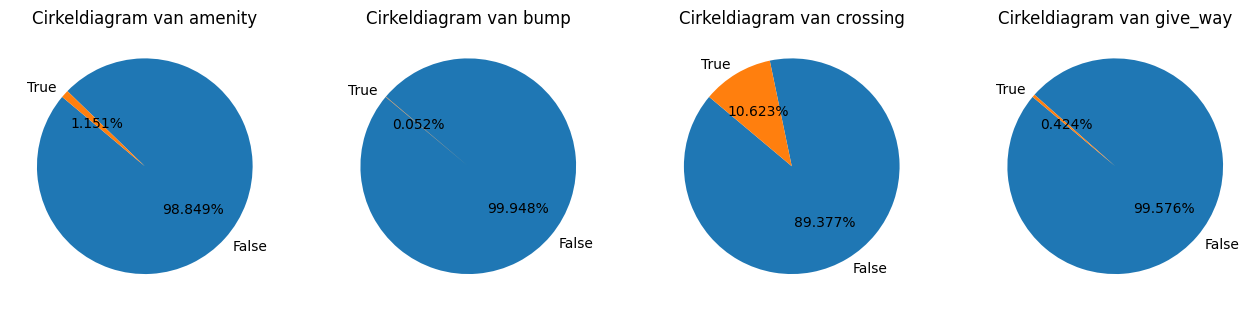

In [20]:
plt.figure(figsize=(16, 6))

plt.subplot(1,4,1)
plt.pie(americabooleans_df['Amenity'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van amenity')

plt.subplot(1,4,2)
plt.pie(americabooleans_df['Bump'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van bump')

plt.subplot(1,4,3)
plt.pie(americabooleans_df['Crossing'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van crossing')

plt.subplot(1,4,4)
plt.pie(americabooleans_df['Give_Way'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van give_way')

plt.show()

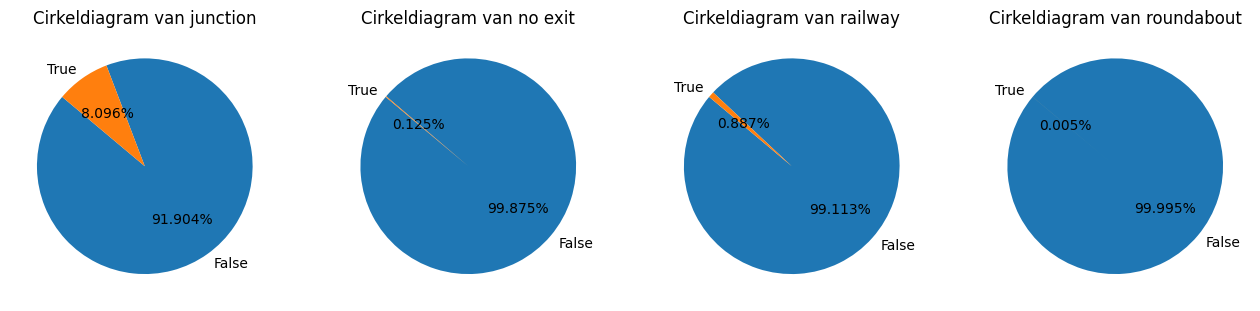

In [35]:
plt.figure(figsize=(16, 6))

plt.subplot(1,4,1)
plt.pie(americabooleans_df['Junction'], labels=['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van junction')

plt.subplot(1,4,2)
plt.pie(americabooleans_df['No_Exit'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van no exit')

plt.subplot(1,4,3)
plt.pie(americabooleans_df['Railway'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van railway')

plt.subplot(1,4,4)
plt.pie(americabooleans_df['Roundabout'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van roundabout')

plt.show()

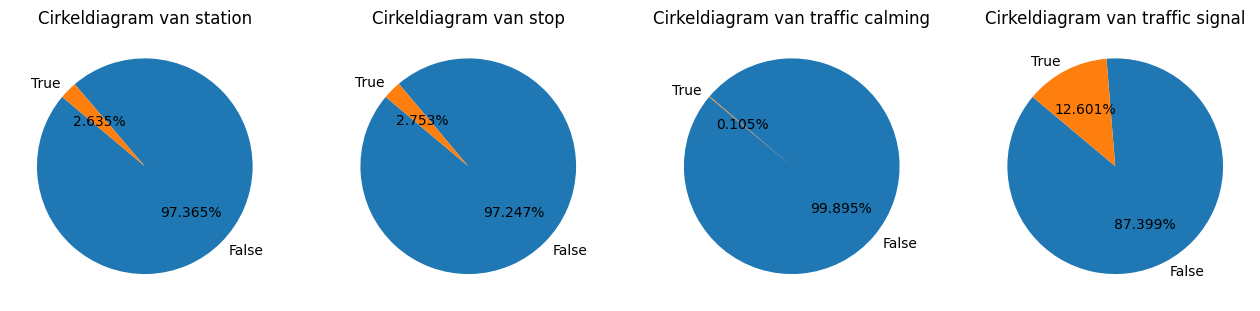

In [21]:
plt.figure(figsize=(16, 6))

plt.subplot(1,4,1)
plt.pie(americabooleans_df['Station'], labels=  ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van station')

plt.subplot(1,4,2)
plt.pie(americabooleans_df['Stop'], labels= ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van stop')

plt.subplot(1,4,3)
plt.pie(americabooleans_df['Traffic_Calming'], labels=  ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van traffic calming')

plt.subplot(1,4,4)
plt.pie(americabooleans_df['Traffic_Signal'], labels=  ['False', 'True'], autopct='%1.3f%%', startangle=140)
plt.title('Cirkeldiagram van traffic signal')

plt.show()

In [38]:
americabooleans_df["Turning_Loop"]

Amenity
False    3513617.0
True           NaN
Name: Turning_Loop, dtype: float64

Overzicht in verhouding hoevaak een bepaalde POI bij een ongeluk aanwezig is.

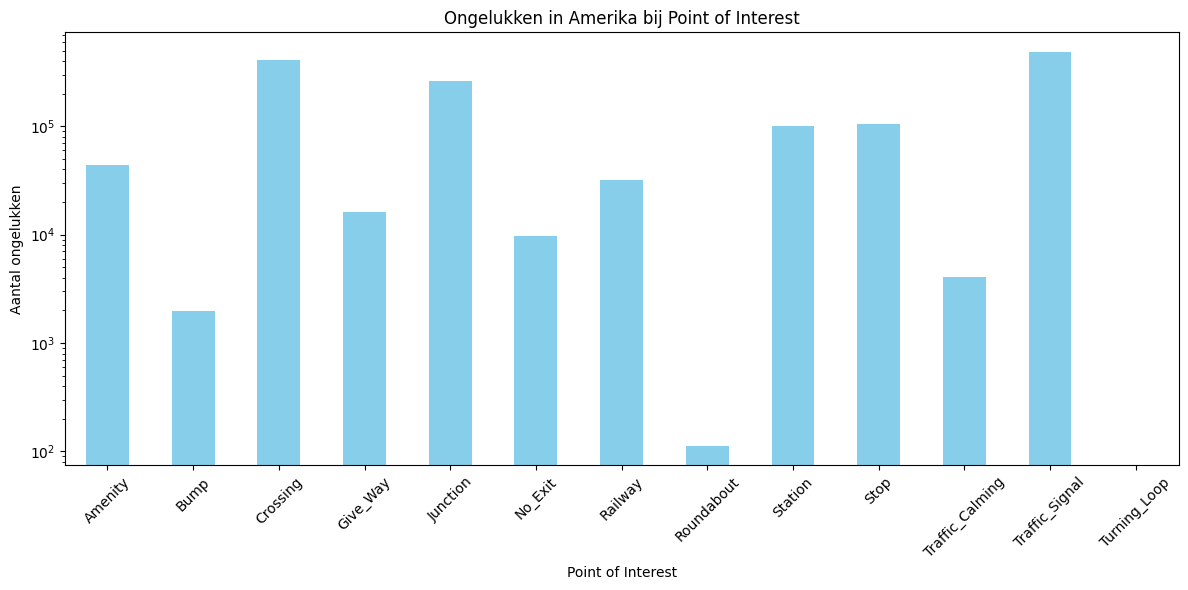

In [22]:
plt.figure(figsize=(12, 6))
americabooleans_df.loc[True].plot(kind='bar', color='skyblue')
plt.title('Ongelukken in Amerika bij Point of Interest')
plt.xlabel('Point of Interest')
plt.ylabel('Aantal ongelukken')
plt.yscale('log')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

Procentueel aantal van ongelukken dat gebeurd bij een POI

In [23]:
som = int(americabooleans_df.loc[True].sum())
perc = som/len(df)*100
print(perc)

38.1644082223628
